# Effect of the poles on the time response of first and second order systems
<br> In this demo we will look what the effect is of the position of the poles on the zeros/poles plot, the step response, the impulse response, the settling time and the rise time.
<br> The rise time is the time when the step response crosses 90% of the value of the steady state error for the <b>first time</b>.<br>
The settling time is the time when the step response starts oscillating in a band of 2% of the steady state error.


In [3]:
%matplotlib inline
from Effect_of_the_poles_on_the_time_response_of_first_and_second_order_systems import *

In [4]:
def calculate_steady_state(TF):
    # Calculate the poles of the system
    poles=pole(TF)
    # If there is a pole in the right half- plane, the system is not stable and we have no  steady state.
    if (True in map(lambda x: real(x) >=0,poles)):
        return None
    # Calculate the step response of the system
    t,y=step_response(TF)
    # Steady steat is last value in sequence
    return y[-1]

def calculate_rise_time(y,t,steady_state):
    # Calculate time to reach the steady state for the first time
    # If there is no steady state, you cann't reach it
    if steady_state == None:
        return None
    # Calculate when first time above 90% of steady state
    for i in range(0,len(y)):
        if y[i]>=steady_state*0.9:
            return t[i]
    return None

def calculate_settling_time(y,t,steady_state):
    # Calculate the settling time
    # If there is no steady state, you cann't settle around it.
    if steady_state==None:
        return None
    # If the last value is already outside the box, don't look for settling time
    if y[-1]> (steady_state +0.02*steady_state) or y[-1] < (steady_state - 0.02*steady_state):
        return None
    else:
        # Run from the back and check when we leave the settling area.
        for i in range(len(y)-1,-1,-1):
            # Break for loop when we leave band around steady state
            if y[i]> (steady_state + 0.02*steady_state) or y[i] < (steady_state - 0.02*steady_state):
                break
        
        return t[i+1]


## First order system
$H(s) = \frac{k}{s-a}$ <br>
Reaction to step input: $Y(s) = \frac{k}{s(s-a)}$<br>
- If $a \neq 0$<br>
     $y(t)= \mathcal{L}^{-1}\Big(\frac{k}{s(s-a)} \Big) = \mathcal{L}^{-1}\Big(\alpha_0 + \frac{\alpha_1}{s} + \frac{\alpha_2}{s-a}\Big) = \alpha_0 \delta(t) + \alpha_1 + \alpha_2 e^{at}$<br>
    * If a < 0:<br>
    $\lim_{t\rightarrow \infty} e^{at} = 0 \Rightarrow \lim_{t\rightarrow \infty} y(t) = \alpha_1$<br>
    <br>
    with $\alpha_1 = \frac{k}{-a}$
    * If a > 0:<br>
    $\lim_{t\rightarrow \infty} e^{at} = \infty \Rightarrow \lim_{t\rightarrow \infty} y(t) = \infty$<br>
    <br>

- If $ a = 0$:<br>
$y(t)= \mathcal{L}^{-1}\Big(\frac{k}{s^2} \Big) = \mathcal{L}^{-1}\Big(\alpha_0 + \frac{\alpha_1}{s} + \frac{\alpha_2}{s^2}\Big) = \alpha_0 \delta(t) + \alpha_1 + \alpha_2 t$<br>
$\lim_{t \rightarrow \infty}y(t) = \infty$
    

H(s)= 


  100
-------
s + 100

Rise time:  0.0233333333333
Settling time:  0.0388888888889


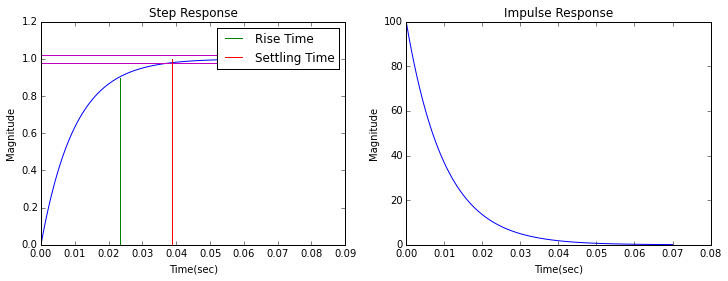

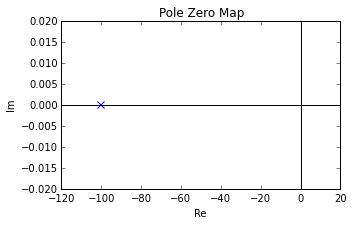

In [5]:
def first_order_system_time_response(k,a):
    """Plots the zero/pole plot, the step response and the impulse response of a first order system."""
    TF = TransferFunction([k],[1,-a])
    print "H(s)= " 
    print 
    print TF
    t_step,y_step = step_response(TF)
    sse= calculate_steady_state(TF)
    t_impulse,y_impulse=impulse_response(TF)
    rise_time = calculate_rise_time(y_step,t_step,sse)
    settling_time = calculate_settling_time(y_step,t_step,sse)
    print "Rise time: ", rise_time if rise_time != None else "Not defined"
    print "Settling time: ",settling_time if settling_time != None else "Not defined"
    draw(t_step,y_step,t_impulse,y_impulse,sse,rise_time,settling_time,TF)
    
    
interact(first_order_system_time_response,k=(0.001,100,1),a=(-100,100,1))

## Second order system
$H(s) = \frac{k}{(s-\alpha)(s-\beta)}$<br>
Response to step input: $Y(s) =\frac{k}{s(s-\alpha)(s-\beta)} $ <br>
- If $\alpha$ and $\beta$ are real (im = 0):<br>
    * If $\alpha,\beta \neq 0$ and $\alpha \neq \beta \Rightarrow y(t) = \mathcal{L}^{-1}\Big(\frac{k}{s(s-\alpha)(s-\beta)} \Big) = \mathcal{L}^{-1}\Big(a_0 + \frac{a_1}{s} + \frac{a_2}{s-\alpha} + \frac{a_3}{s-\beta}\Big) = a_0 \delta(t) + a_1 + a_2 e^{\alpha t} + a_3 e^{\beta t} $<br>
        o If $\alpha/\beta > 0: \lim_{t \rightarrow \infty} y(t) = \infty$<br>
        o If $\alpha,\beta < 0: \lim_{t \rightarrow \infty} y(t) = a_1$<br>
    <br>
    * If $\alpha,\beta \neq 0$ and $\alpha = \beta \Rightarrow y(t) = \mathcal{L}^{-1}\Big(\frac{k}{s(s-\alpha)^2} \Big) = \mathcal{L}^{-1}\Big(a_0 + \frac{a_1}{s} + \frac{a_2}{s-\alpha} + \frac{a_3}{(s-\alpha)^2}\Big) =a_0 \delta(t) + a_1 + a_2 e^{\alpha t} + a_3 t e^{\alpha t}$<br>
        o If $\alpha > 0: \lim_{t \rightarrow \infty} y(t) = \infty$<br>
        o If $\alpha < 0: \lim_{t \rightarrow \infty} y(t) = a_1$<br>
    <br>
    * If $\alpha/\beta = 0 \Rightarrow y(t) = \mathcal{L}^{-1}\Big(\frac{k}{s^2(s-\beta/\alpha)} \Big) = \mathcal{L}^{-1}\Big(a_0 + \frac{a_1}{s} + \frac{a_2}{s^2} + \frac{a_3}{s-\beta/\alpha} \Big) = a_0 \delta(t) + a_1 + a_2 t + a_3 e^{\beta / \alpha t}$ <br>
    $\lim_{t\rightarrow \infty} y(t) = \infty$<br>
    <br>
    * If $\alpha,\beta = 0 \Rightarrow y(t) = \mathcal{L}^{-1}\Big(\frac{k}{s^3} \Big) = \mathcal{L}^{-1}\Big(a_0 + \frac{a_1}{s} + \frac{a_2}{s^2} + \frac{a_3}{s^3} \Big) = a_0 \delta(t) + a_1 + a_2 t + a_3 \frac{t^2}{2}$ <br>
      $\lim_{t\rightarrow \infty} y(t) = \infty$<br>
      <br>
- If $im \neq 0 \Rightarrow \alpha,\beta$ are complex conjugate, $\alpha = a + Im*j, \beta = a-*Im j $:<br>
   - $ y(t) = \mathcal{L}^{-1}\Big(\frac{k}{s(s-(a+Im*j))(s-(a-Im*j))} \Big) = \mathcal{L}^{-1}\Big(a_0 + \frac{a_1}{s} + \frac{a_2}{s-(a+Im j)} + \frac{a_3}{s-(a-Im j)}\Big) = a_0 \delta(t) + a_1 + R_1 e^{j\theta_1} e^{at}(cos(Im t) + sin(Im t))  + R_1 e^{-j\theta_1} e^{at}(cos(Im t) - sin(Im t)) $<br>  
        * If $a >0 $:
        $\lim_{t\rightarrow \infty} y(t) = \infty$
        * If $a= 0$ :
        $\lim_{t \rightarrow \infty} y(t) = undefined$ <br>
        * If $a <0$ :
        $ \lim_{t \rightarrow \infty} y(t) = a_1$

H(s)= 


       49
---------------
s^2 + 4 s + 125

Rise time:  0.176767676768
Settling time:  1.80303030303


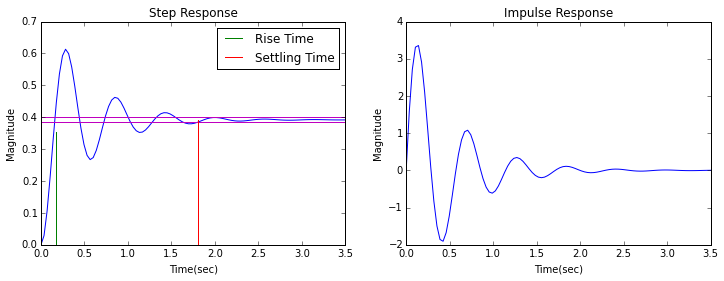

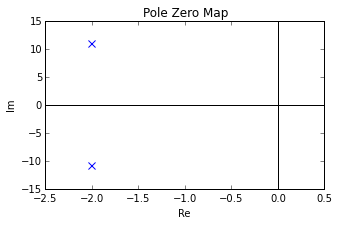

In [6]:
def second_order_system_time_response(k,a,b,im):
    """Plots the zero/pole plot, the step response and the impulse response of a second order system."""
    if a!=b and im !=0:
        print """A real system can't have complex poles that are not each other's conjugates!!!"""
    else:
        TF = TransferFunction([k,],[1,-real(((a+im*1j)+(b-im*1j))),real(a*b-(im*1j)**2)])
        print "H(s)= "
        print 
        print TF
        t_step,y_step=step_response(TF)
        t_impulse,y_impulse=impulse_response(TF)
        sse= calculate_steady_state(TF)
        rise_time = calculate_rise_time(y_step,t_step,sse)
        settling_time = calculate_settling_time(y_step,t_step,sse)
        print "Rise time: ", rise_time if rise_time != None else "Not defined"
        print "Settling time: ",settling_time if settling_time != None else "Not defined"
        draw(t_step,y_step,t_impulse,y_impulse,sse,rise_time,settling_time,TF)
        
        
        
interact(second_order_system_time_response,k=(0.001,100,1),a=(-50,50,1),b=(-50,50,1),im=(-50,50,1))